In [54]:
%matplotlib inline
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from pathlib import Path
import librosa, librosa.display
import IPython.lib.display as ipd


### Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [55]:
results = pd.read_csv('./surveyresult/results.csv', dtype={'happiness': str}, encoding='latin-1')

In [56]:
results.describe()

,file,happiness
count,61,61
unique,61,5
top,islamei.mp3,3
freq,1,21


In [57]:
results.happiness.unique()

array(['2', '4', '3', '1', '5'], dtype=object)

In [58]:
di = {'1': 'sad', '2': 'sad', '3': 'neutral', '4':'happy', '5':'happy'}

In [59]:
results = results.replace({"happiness": di})

In [60]:
results.head()

,file,happiness
0,beethoven_hammerklavier_3.mp3,sad
1,islamei.mp3,happy
2,waldstein_3.mp3,happy
3,alb_se1.mp3,happy
4,beethoven_les_adieux_1.mp3,neutral


In [61]:
musicdf = pd.read_csv('./musicdf30.csv', index_col=0, encoding='latin-1')

In [62]:
musicdf.head()

,composer,description,symphony,file,part,tempo,bpm,duration,zero_crossings,spectral_centroid_avg,...,Chroma_SD_B,Chroma_SD_C,Chroma_SD_C#,Chroma_SD_D,Chroma_SD_D#,Chroma_SD_E,Chroma_SD_F,Chroma_SD_F#,Chroma_SD_G,Chroma_SD_G#
0,albeniz,Albeniz Isaac(1860-1909),Espana Opus 165,alb_esp1.mp3,Prelude,Andantino,120.185320,93.570612,98094,621.574748,...,0.175779,0.193223,0.195864,0.210012,0.152202,0.207500,0.167383,0.110378,0.088626,0.167561
1,albeniz,Albeniz Isaac(1860-1909),Espana Opus 165,alb_esp2.mp3,Tango,Andantino,120.185320,128.705306,110224,542.039355,...,0.197480,0.148901,0.147744,0.189628,0.138035,0.170995,0.157763,0.167537,0.135463,0.170640
2,albeniz,Albeniz Isaac(1860-1909),Espana Opus 165,alb_esp3.mp3,Malaguena,Allegretto,117.453835,176.039184,214944,701.140112,...,0.169860,0.132680,0.120317,0.154430,0.158160,0.156281,0.122567,0.140689,0.124910,0.123183
3,albeniz,Albeniz Isaac(1860-1909),Espana Opus 165,alb_esp4.mp3,Serenata,Allegretto,112.347147,195.422041,203680,631.094119,...,0.166632,0.175509,0.142637,0.183892,0.158628,0.137726,0.137628,0.148855,0.166665,0.141932
4,albeniz,Albeniz Isaac(1860-1909),Espana Opus 165,alb_esp5.mp3,Capricho Catalan,Allegretto,120.185320,124.499592,118904,570.265597,...,0.119192,0.095741,0.103875,0.100934,0.081791,0.107883,0.133893,0.125197,0.166297,0.131250


In [63]:
results.shape

(61, 2)

In [64]:
musicdf.shape

(61, 59)

In [65]:
results = pd.merge(results, musicdf, on='file')

In [66]:
results.columns

Index(['file', 'happiness', 'composer', 'description', 'symphony', 'part',
       'tempo', 'bpm', 'duration', 'zero_crossings', 'spectral_centroid_avg',
       'spectral_bw_avg', 'Chroma_A', 'Chroma_A#', 'Chroma_B', 'Chroma_C',
       'Chroma_C#', 'Chroma_D', 'Chroma_D#', 'Chroma_E', 'Chroma_F',
       'Chroma_F#', 'Chroma_G', 'Chroma_G#', 'MFCC_0', 'MFCC_1', 'MFCC_10',
       'MFCC_11', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7',
       'MFCC_8', 'MFCC_9', 'MFCC_SD_0', 'MFCC_SD_1', 'MFCC_SD_10',
       'MFCC_SD_11', 'MFCC_SD_2', 'MFCC_SD_3', 'MFCC_SD_4', 'MFCC_SD_5',
       'MFCC_SD_6', 'MFCC_SD_7', 'MFCC_SD_8', 'MFCC_SD_9', 'Chroma_SD_A',
       'Chroma_SD_A#', 'Chroma_SD_B', 'Chroma_SD_C', 'Chroma_SD_C#',
       'Chroma_SD_D', 'Chroma_SD_D#', 'Chroma_SD_E', 'Chroma_SD_F',
       'Chroma_SD_F#', 'Chroma_SD_G', 'Chroma_SD_G#'],
      dtype='object')

In [67]:
#mfcc_columns = (['MFCC_0', 'MFCC_1', 'MFCC_10',
#       'MFCC_11', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7',
#       'MFCC_8', 'MFCC_9', 'MFCC_SD_0', 'MFCC_SD_1', 'MFCC_SD_10',
#       'MFCC_SD_11', 'MFCC_SD_2', 'MFCC_SD_3', 'MFCC_SD_4', 'MFCC_SD_5',
#       'MFCC_SD_6', 'MFCC_SD_7', 'MFCC_SD_8', 'MFCC_SD_9']);

In [68]:
feature_cols = results.columns.drop(['composer', 'description', 'symphony', 'tempo', 'file', 'part', 'duration']);

In [69]:
df = results[feature_cols]

In [70]:
df.columns

Index(['happiness', 'bpm', 'zero_crossings', 'spectral_centroid_avg',
       'spectral_bw_avg', 'Chroma_A', 'Chroma_A#', 'Chroma_B', 'Chroma_C',
       'Chroma_C#', 'Chroma_D', 'Chroma_D#', 'Chroma_E', 'Chroma_F',
       'Chroma_F#', 'Chroma_G', 'Chroma_G#', 'MFCC_0', 'MFCC_1', 'MFCC_10',
       'MFCC_11', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7',
       'MFCC_8', 'MFCC_9', 'MFCC_SD_0', 'MFCC_SD_1', 'MFCC_SD_10',
       'MFCC_SD_11', 'MFCC_SD_2', 'MFCC_SD_3', 'MFCC_SD_4', 'MFCC_SD_5',
       'MFCC_SD_6', 'MFCC_SD_7', 'MFCC_SD_8', 'MFCC_SD_9', 'Chroma_SD_A',
       'Chroma_SD_A#', 'Chroma_SD_B', 'Chroma_SD_C', 'Chroma_SD_C#',
       'Chroma_SD_D', 'Chroma_SD_D#', 'Chroma_SD_E', 'Chroma_SD_F',
       'Chroma_SD_F#', 'Chroma_SD_G', 'Chroma_SD_G#'],
      dtype='object')

In [71]:
X, y = df.loc[:, df.columns != 'happiness'].values, df.loc[:, 'happiness'].values

In [72]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [73]:
X_train.shape

(45, 52)

In [74]:
X_test.shape

(16, 52)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [77]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [78]:
y_train_pred = forest.predict(X_train)

In [79]:
y_test_pred = forest.predict(X_test)

In [80]:
pd.crosstab(y_test, y_test_pred, rownames=['actual'], colnames=['preds'],margins=True)

preds,neutral,sad,All
actual,,,
happy,4,3,7
neutral,1,3,4
sad,1,4,5
All,6,10,16


In [82]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.312


In [87]:
y_test

array(['happy', 'happy', 'sad', 'neutral', 'neutral', 'happy', 'happy',
       'neutral', 'happy', 'sad', 'neutral', 'happy', 'sad', 'sad', 'sad',
       'happy'], dtype=object)

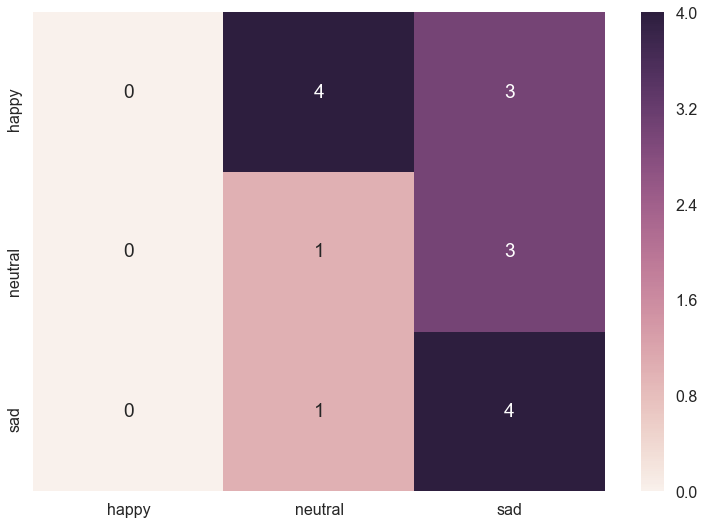

In [89]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred), columns=['happy','neutral','sad'], index=['happy','neutral','sad'])
sns.heatmap(cm, annot=True)

In [90]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [91]:
total_features = X_test.shape[1]

In [92]:
forest.n_features_

52

In [93]:
column_names = df.loc[:, df.columns != 'happiness'].columns.tolist()

In [94]:
print("Feature ranking:")

for f in range(forest.n_features_):
    print("%d. feature %s (%f)" % (f + 1, column_names[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature spectral_centroid_avg (0.048722)
2. feature MFCC_2 (0.042173)
3. feature bpm (0.037655)
4. feature Chroma_SD_C (0.035174)
5. feature MFCC_0 (0.032522)
6. feature MFCC_1 (0.030969)
7. feature MFCC_4 (0.029513)
8. feature MFCC_SD_3 (0.027937)
9. feature MFCC_3 (0.027018)
10. feature Chroma_C# (0.025312)
11. feature Chroma_SD_C# (0.025057)
12. feature Chroma_SD_D# (0.023877)
13. feature MFCC_SD_6 (0.023525)
14. feature Chroma_SD_E (0.022699)
15. feature MFCC_5 (0.021270)
16. feature Chroma_SD_G# (0.021170)
17. feature MFCC_6 (0.019858)
18. feature zero_crossings (0.019687)
19. feature Chroma_SD_F# (0.018897)
20. feature spectral_bw_avg (0.018896)
21. feature Chroma_SD_A# (0.018816)
22. feature MFCC_SD_4 (0.018719)
23. feature MFCC_SD_7 (0.017353)
24. feature MFCC_10 (0.017268)
25. feature Chroma_G (0.017235)
26. feature MFCC_SD_5 (0.016779)
27. feature MFCC_11 (0.016752)
28. feature MFCC_9 (0.016119)
29. feature Chroma_SD_B (0.016101)
30. feature MFCC_7 (0.0160

In [95]:
column_names = np.array(column_names)[indices].tolist()

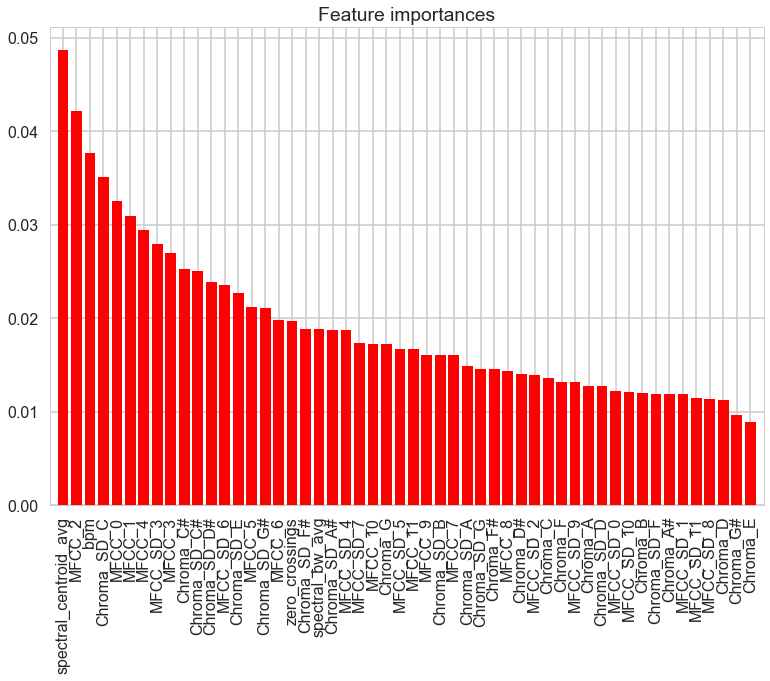

In [96]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(forest.n_features_), importances[indices],
       color="r",  align="center")
plt.xticks(range(forest.n_features_), column_names, rotation='vertical')
plt.xlim([-1, forest.n_features_])
plt.show()